In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constants

In [2]:
c = constants.c
e = constants.e
m0 = constants.m_e
r = 0.05

def energies(data):
    return 1e-3*(np.sqrt((e*data[:,0]*1e-3*r*c)**2 + (m0*c**2)**2) - m0*c**2)/e
def generate_plot(counts, energies, T, filename):
    fig, ax = plt.subplots(1,1,dpi=150, figsize=(10,10))
    ax.plot(energies, counts, "k")
    ax.scatter(energies, counts, color="k")
    ax.grid()
    ax.set_ylabel(f"Counts [for {T} seconds]")
    ax.set_xlabel("Energy [keV]")
    ax.set_ylim(bottom=0)
    fig.savefig(filename)
    max = counts[0]
    maxi = 0
    for i, count in enumerate(counts):
        if max < counts[i]:
            max = counts[i]
            maxi = i
    return energies[maxi], counts[maxi]

def doitall(filename, plotFilename):
    fh = open(filename, "r")
    data = np.array([np.array(list(map(float, line.split()))) for line in fh.readlines()])
    fh.close()
    energy = energies(data)
    T = 60
    maximas = generate_plot(data[:,3], energy, T, plotFilename)
    return maximas
    

(310.36542196182313, 134.0)

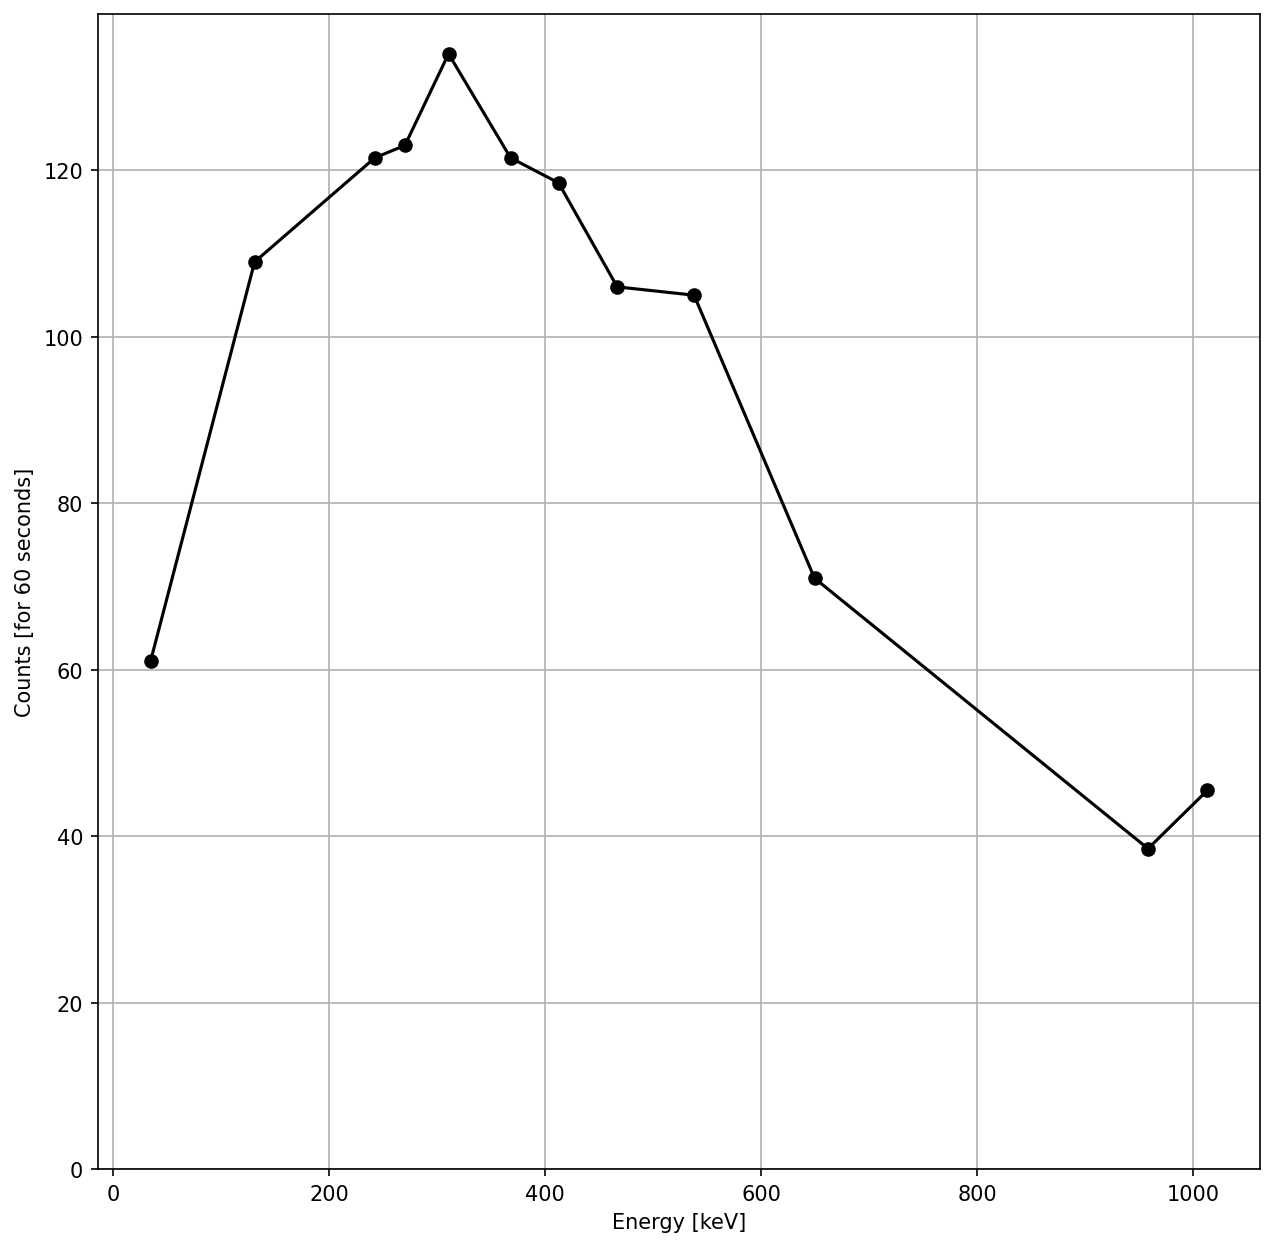

In [3]:
na = doitall("na-data.txt", "na-plot.png")
na

(662.8321318364602, 1471.0)

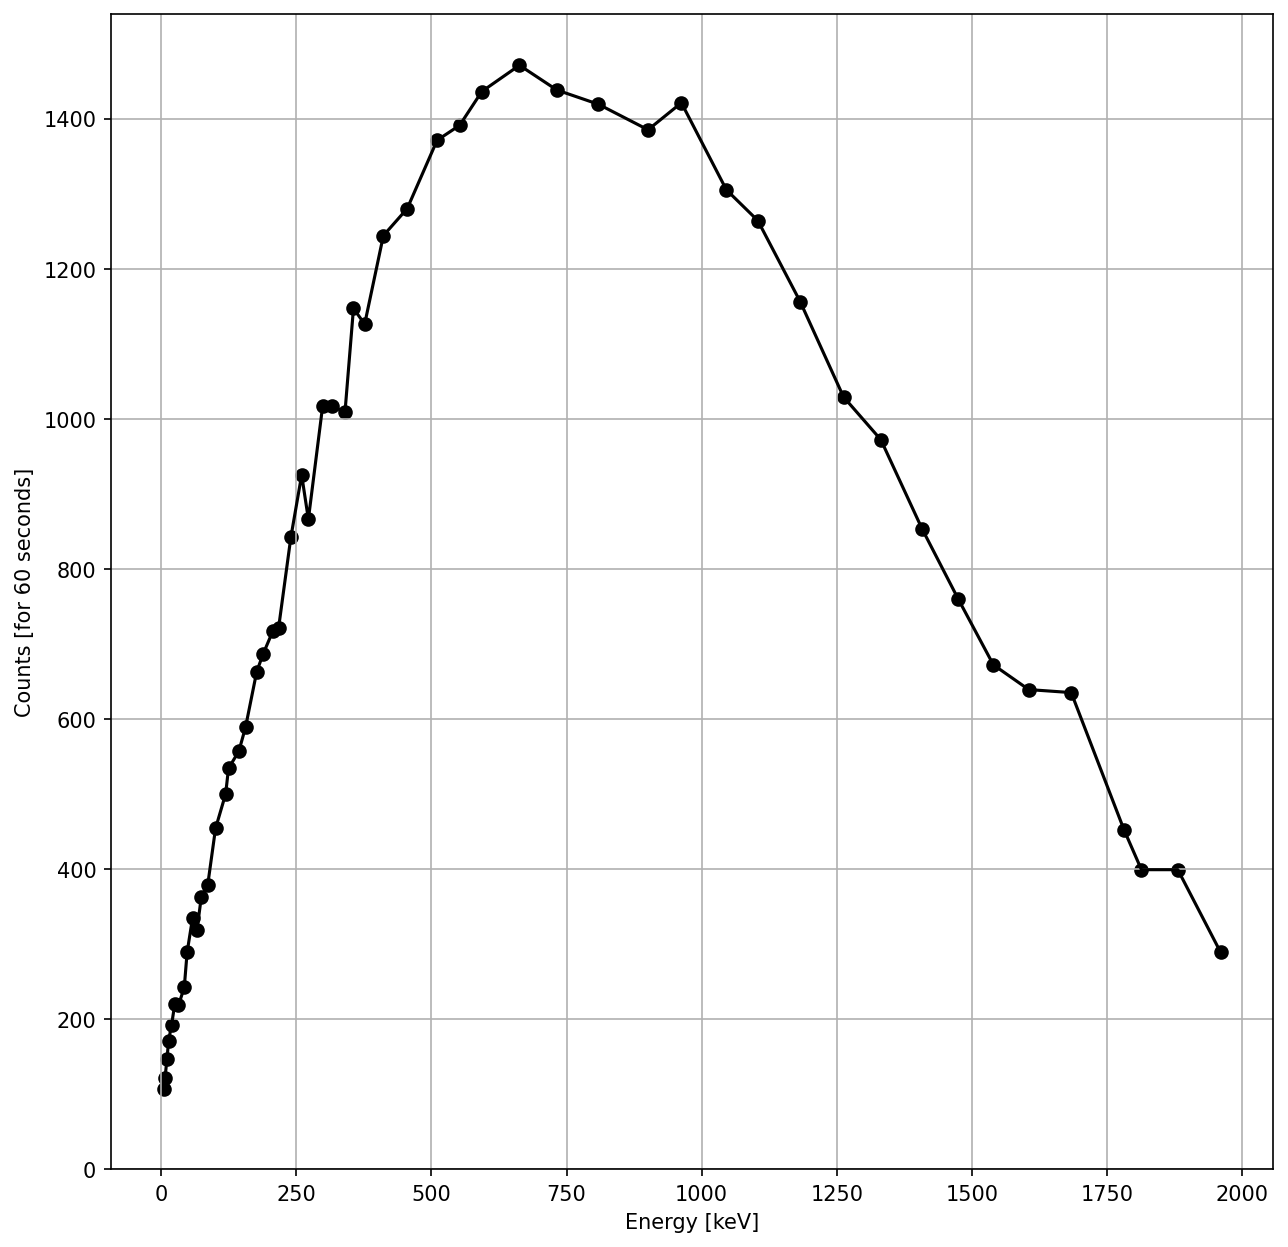

In [4]:
sr = doitall("sr-data.txt", "sr-plot.png")
sr